¡Hola!

Mi nombre es Marcos Torres y tengo el gusto de revisar tu código el día de hoy.

Cuando vea algo notable o algún asunto en el notebook, te dejaré un comentario o un hint. Se que encontraras la mejor respuesta para resolver todos los comentarios, de no ser así, no te preocupes en futuras iteraciones dejaré comentarios y pistas más específicos.

Encontrarás comentarios en verde, amarillo o rojo como los siguientes:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buen trabajo. ¡Lo hiciste muy bien!
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Nota. Se puede mejorar.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Necesitas corregirlo. Este bloque indica que se requiere una correción. El trabajo no se acepta si tiene estos bloques.
</div>

Puedes responder a mis comentarios usando estos bloques:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
</div>

# Proyecto de pruebas A/B
## Ejercicio
Has recibido una tarea analítica de una tienda en línea internacional. Tus predecesores no consiguieron completarla: lanzaron una prueba A/B y luego abandonaron (para iniciar una granja de sandías en Brasil). Solo dejaron las especificaciones técnicas y los resultados de las pruebas.

Descripción técnica
*  Nombre de la prueba: **recommender_system_test**
*  Grupos: А (control), **B (nuevo embudo de pago)**
*  Fecha de lanzamiento: 2020-12-07
*  Fecha en la que dejaron de aceptar nuevos usuarios: 2020-12-21
*  Fecha de finalización: 2021-01-01
*  Audiencia: 15% de los nuevos usuarios de la región de la UE
*  Propósito de la prueba: **probar cambios relacionados con la introducción de un sistema de recomendaciones mejorado**
*  Resultado esperado: dentro de los 14 días posteriores a la inscripción, los usuarios mostrarán una mejor conversión en
vistas de la página del producto (el evento product_page), instancias de agregar artículos al carrito de compras (product_cart) y compras (purchase).

En cada etapa del embudo product_page → product_cart → purchase, habrá al menos un 10% de aumento.

Número previsto de participantes de la prueba: 6 000
Descarga los datos de la prueba, comprueba si se ha realizado correctamente y analiza los resultados.

Descripción de los datos
Descarga los datasets de Notion.

Para acceder a los datasets de la plataforma, agrega /datasets/ al principio de la ruta del archivo (por ejemplo, /datasets/ab_project_marketing_events_us.csv).

ab_project_marketing_events_us.csv — el calendario de eventos de marketing para 2020

final_ab_new_users_upd_us.csv — todos los usuarios que se registraron en la tienda en línea desde el 7 hasta el 21 de diciembre de 2020

final_ab_events_upd_us.csv — todos los eventos de los nuevos usuarios en el período comprendido entre el 7 de diciembre de 2020 y el 1 de enero de 2021

final_ab_participants_upd_us.csv — tabla con los datos de los participantes de la prueba

#### Estructura ab_project__marketing_events_us.csv:
    *name — el nombre del evento de marketing
    *regions — regiones donde se llevará a cabo la campaña publicitaria
    *start_dt — fecha de inicio de la campaña
    *finish_dt — fecha de finalización de la campaña

#### Estructura final_ab_new_users_upd_us.csv:
    *user_id
    *first_date — fecha de inscripción
    *region
    *device — dispositivo utilizado para la inscripción

#### Estructura final_ab_events_upd_us.csv:
    *user_id
    *event_dt — fecha y hora del evento
    *event_name — nombre del tipo de evento
    *details — datos adicionales sobre el evento (por ejemplo, el pedido total en USD para los eventos purchase)

#### Estructura final_ab_participants_upd_us.csv:
    *user_id
    *ab_test — nombre de la prueba
    *group — el grupo de prueba al que pertenecía el usuario

Instrucciones para completar la tarea

Explora los datos:

- ¿Es necesario convertir los tipos?
- ¿Hay valores ausentes o duplicados? Si es así, ¿cómo los caracterizarías?
- Lleva a cabo el análisis exploratorio de datos:
- Estudia la conversión en las diferentes etapas del embudo.
- ¿El número de eventos por usuario está distribuido equitativamente entre las muestras?
- ¿Hay usuarios que están presentes en ambas muestras?
- ¿Cómo se distribuye el número de eventos entre los días?
- ¿Hay alguna peculiaridad en los datos que hay que tener en cuenta antes de iniciar la prueba A/B?
- Evaluar los resultados de la prueba A/B:
- ¿Qué puedes decir sobre los resultados de la prueba A/B?
- Utiliza una prueba z para comprobar la diferencia estadística entre las proporciones.
- Describe tus conclusiones con respecto a la etapa EDA y los resultados de la prueba A/B.

**Describe los objetivos del estudio:**

Probar cambios relacionados con la introducción de un sistema de recomendaciones mejorado.
Resultado esperado: dentro de los 14 días posteriores a la inscripción, los usuarios mostrarán una mejor conversión en vistas de la página del producto (el evento product_page), instancias de agregar artículos al carrito de compras (product_cart) y compras (purchase).
En cada etapa del embudo product_page → product_cart → purchase, habrá al menos un 10% de aumento.

Explora los datos:

In [83]:
# carga de datos

import pandas as pd
import datetime as dt

events = pd.read_csv('/datasets/ab_project_marketing_events_us.csv')
print('events')
print(events.head())
print()
print(events.info())
print('*****************************')
new_users = pd.read_csv('/datasets/final_ab_new_users_upd_us.csv')
print('new_users')
print(new_users.head())
print()
print(new_users.info())
print('*****************************')
ab_events = pd.read_csv('/datasets/final_ab_events_upd_us.csv')
print('ab_events')
print()
print(ab_events.head())
print()
print(ab_events.info())
print('*****************************')
participants = pd.read_csv('/datasets/final_ab_participants_upd_us.csv')
print('participants')
print(participants.head())
print()
print(participants.info())
print()

events
                           name                   regions    start_dt  \
0      Christmas&New Year Promo             EU, N.America  2020-12-25   
1  St. Valentine's Day Giveaway  EU, CIS, APAC, N.America  2020-02-14   
2        St. Patric's Day Promo             EU, N.America  2020-03-17   
3                  Easter Promo  EU, CIS, APAC, N.America  2020-04-12   
4             4th of July Promo                 N.America  2020-07-04   

    finish_dt  
0  2021-01-03  
1  2020-02-16  
2  2020-03-19  
3  2020-04-19  
4  2020-07-11  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       14 non-null     object
 1   regions    14 non-null     object
 2   start_dt   14 non-null     object
 3   finish_dt  14 non-null     object
dtypes: object(4)
memory usage: 576.0+ bytes
None
*****************************
new_users
            user_id  first_date


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buen trabajo. Usaste una celda independiente para importar las librerías y otra para leer los datos.
</div>

In [84]:
# ¿Es necesario convertir los tipos? Si, cambiamos los valores a tipo fecha en donde corresponde

events['start_dt'] = pd.to_datetime(events['start_dt'], format='%Y-%m-%d')

events['finish_dt'] = pd.to_datetime(events['finish_dt'], format='%Y-%m-%d')

new_users['first_date'] = pd.to_datetime(new_users['first_date'], format='%Y-%m-%d')

ab_events['event_dt'] = pd.to_datetime(ab_events['event_dt'])

In [85]:
# ¿Hay valores ausentes o duplicados?

print(events.duplicated().sum())
print(new_users.duplicated().sum())
print(ab_events.duplicated().sum())
print(participants.duplicated().sum())

0
0
0
0



<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buen uso del método to_datetime para manejar las columnas de tipo fecha.
</div>

In [86]:
# En el df participants revisar los datos que tiene la columna ab_test

participants['ab_test'].value_counts()

interface_eu_test          10850
recommender_system_test     3675
Name: ab_test, dtype: int64

In [87]:
# Eliminar los valores "interface_eu_test" de la columna ab_test ya que la prueba que necesitamos es la de recommender_system_test

participants = participants.drop(participants[participants['ab_test'] == 'interface_eu_test'].index)

participants['ab_test'].value_counts()

recommender_system_test    3675
Name: ab_test, dtype: int64


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Bien, limpiaste correctamente la tabla.
</div>

In [88]:
# Unimos el df participants con el new_users a través de la columna user_id para agregar la columna first_date

participants  = participants.merge(new_users[['user_id', 'first_date']], on='user_id', how='left')

# eliminar la columna ab_test

participants = participants.drop(columns=['ab_test'])

participants.head()

,user_id,group,first_date
0,D1ABA3E2887B6A73,A,2020-12-07
1,A7A3664BD6242119,A,2020-12-20
2,DABC14FDDFADD29E,A,2020-12-08
3,04988C5DF189632E,A,2020-12-14
4,4FF2998A348C484F,A,2020-12-20


In [89]:
# Unimos el df "participants" con el df "ab_events" a través de la columna "user_id" para agregar las columnas "event_dt" y "event_name"

participants = participants.merge(ab_events[['user_id', 'event_dt', 'event_name', 'details']], on='user_id', how='left')

participants.head()

,user_id,group,first_date,event_dt,event_name,details
0,D1ABA3E2887B6A73,A,2020-12-07,2020-12-07 14:43:27,purchase,99.99
1,D1ABA3E2887B6A73,A,2020-12-07,2020-12-07 14:43:29,product_cart,NaN
2,D1ABA3E2887B6A73,A,2020-12-07,2020-12-07 14:43:27,product_page,NaN
3,D1ABA3E2887B6A73,A,2020-12-07,2020-12-07 14:43:27,login,NaN
4,A7A3664BD6242119,A,2020-12-20,2020-12-20 15:46:06,product_page,NaN



<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

El merge se realizó adecuadamente.
</div>

In [90]:
# Estudia la conversión en las diferentes etapas del embudo ('event_name').

participants.groupby('event_name').agg({'user_id': 'count'})


,user_id
event_name,
login,10837
product_cart,3160
product_page,6702
purchase,3210


In [91]:
# ¿El número de eventos ('event_name') por usuario ('user_id') está distribuido equitativamente entre las muestras ('group')?

participants.groupby('group').agg({'user_id': 'count','event_name': 'count'})

,user_id,event_name
group,,
A,18627,18627
B,5282,5282


In [92]:
# sumamos el total de user_id y de event_name de los dos grupos

print(participants['user_id'].count())
print(participants['event_name'].count())

23909
23909


In [93]:
# Indica si algún "users_id" tiene valor A y B en la columna "group" del df "grouped_users"
grouped_users = participants.groupby('user_id').agg({'group': 'nunique'})
print(grouped_users.head())

# Indicar si hay algún valor de la columna group que tenga sea >1

grouped_users['group'].value_counts()

                  group
user_id                
001064FEAAB631A1      1
0010A1C096941592      1
00341D8401F0F665      1
003DF44D7589BBD4      1
00505E15A9D81546      1


1    3675
Name: group, dtype: int64

In [94]:

# Cambiamos el formato de la columna event_dt a days

participants['event_dt'] = participants['event_dt'].dt.date

participants.head()

,user_id,group,first_date,event_dt,event_name,details
0,D1ABA3E2887B6A73,A,2020-12-07,2020-12-07,purchase,99.99
1,D1ABA3E2887B6A73,A,2020-12-07,2020-12-07,product_cart,NaN
2,D1ABA3E2887B6A73,A,2020-12-07,2020-12-07,product_page,NaN
3,D1ABA3E2887B6A73,A,2020-12-07,2020-12-07,login,NaN
4,A7A3664BD6242119,A,2020-12-20,2020-12-20,product_page,NaN



<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buen agrupamiento de los datos.
</div>

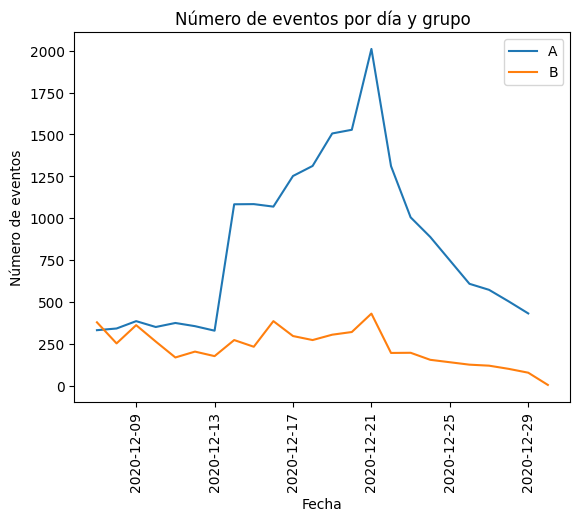

In [95]:
import matplotlib.pyplot as plt
import numpy as np

# Gráficamos como se distribuye el número de eventos ('event_name') por grupo ('group') entre los días ('event_dt')

event_per_day_group_A = (participants[participants['group'] == 'A'].groupby('event_dt').agg({'event_name': 'count'}))
event_per_day_group_B = (participants[participants['group'] == 'B'].groupby('event_dt').agg({'event_name': 'count'}))

plt.plot(event_per_day_group_A.index, event_per_day_group_A['event_name'], label='A')
plt.plot(event_per_day_group_B.index, event_per_day_group_B['event_name'], label='B')
plt.xlabel('Fecha')
plt.ylabel('Número de eventos')
plt.title('Número de eventos por día y grupo')
plt.xticks(rotation=90)
plt.legend()


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

¡Muy bien! Esta gráfica es muy buena, se puede visualizar correctamente la diferencia entre los dos grupos, además la gráfica contiene todos los detalles necesarios para entenderla correctamente: tiene nombres en los ejes, título y leyendas.
</div>

In [96]:
# Crea un df que contenga event_name == purchase

purchase_df = participants[participants['event_name'] == 'purchase']
purchase_df.head()

,user_id,group,first_date,event_dt,event_name,details
0,D1ABA3E2887B6A73,A,2020-12-07,2020-12-07,purchase,99.99
11,04988C5DF189632E,A,2020-12-14,2020-12-14,purchase,4.99
12,04988C5DF189632E,A,2020-12-14,2020-12-15,purchase,4.99
13,04988C5DF189632E,A,2020-12-14,2020-12-18,purchase,9.99
14,04988C5DF189632E,A,2020-12-14,2020-12-20,purchase,4.99


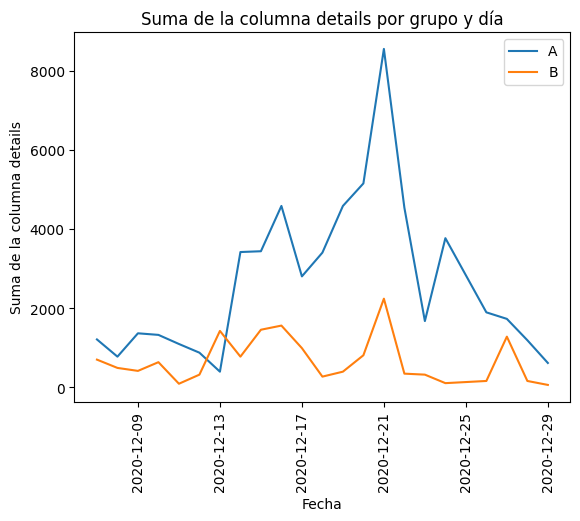

In [97]:
# Representa gráficamente como se distribuye la suma de la columna details por grupo ('group') en el transcurso de los días ('event_dt')

purchase_df_group_A = (purchase_df[purchase_df['group'] == 'A'].groupby('event_dt').agg({'details': 'sum'}))

purchase_df_group_B = (purchase_df[purchase_df['group'] == 'B'].groupby('event_dt').agg({'details': 'sum'}))

plt.plot(purchase_df_group_A.index, purchase_df_group_A['details'], label='A')
plt.plot(purchase_df_group_B.index, purchase_df_group_B['details'], label='B')
plt.xlabel('Fecha')
plt.ylabel('Suma de la columna details')
plt.title('Suma de la columna details por grupo y día')
plt.xticks(rotation=90)
plt.legend()


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buen trabajo. 
</div>

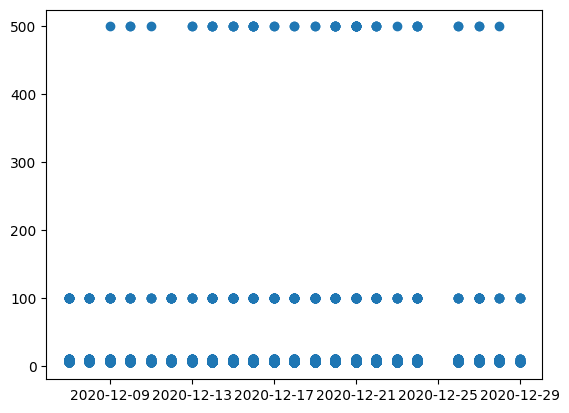

In [98]:
# Traza un gráfico de dispersión de los precios de los pedidos.

x_values = pd.Series(purchase_df['event_dt'])
y_values = pd.Series(purchase_df['details'])

plt.scatter(x_values, y_values)

In [99]:
# Buscamos la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos en bruto.
# hipotesis nula: El nuevo sistema probado en el grupo B aumenta el monto de compras.

import scipy.stats as st

alpha = .05

purchase_df_group_A = (purchase_df[purchase_df['group'] == 'A'].groupby('event_dt', as_index=False).agg({'details': pd.Series.nunique}))
purchase_df_group_B = (purchase_df[purchase_df['group'] == 'B'].groupby('event_dt', as_index=False).agg({'details': pd.Series.nunique}))

sampleA = pd.concat([purchase_df_group_A['details'],pd.Series(0, index=np.arange(participants[participants['group']=='A']['details'].sum() - len(purchase_df_group_A['details'])), name='purchases')],axis=0)
sampleB = pd.concat([purchase_df_group_B['details'],pd.Series(0, index=np.arange(participants[participants['group']=='B']['details'].sum() - len(purchase_df_group_B['details'])), name='purchases')],axis=0)

print("{0:.5f}".format(st.mannwhitneyu(sampleA, sampleB)[1]), 'El valor p es inferior a 0.05 por lo que rechazamos la hipótesis nula.')
print("{0:.3f}".format(sampleB.mean()/sampleA.mean()-1), 'La ganancia de conversión relativa del grupo B en comparación con el grupo A es del 235%')


0.00000 El valor p es inferior a 0.05 por lo que rechazamos la hipótesis nula.
2.353 La ganancia de conversión relativa del grupo B en comparación con el grupo A es del 235%


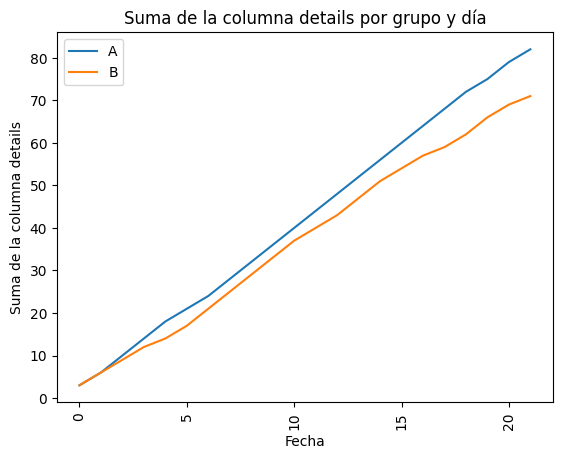

In [100]:
# Gráficamos la diferencia relativa en la conversión acumulada B vs A

plt.plot(purchase_df_group_A.index, purchase_df_group_A['details'].cumsum(), label='A')
plt.plot(purchase_df_group_B.index, purchase_df_group_B['details'].cumsum(), label='B')
plt.xlabel('Fecha')
plt.ylabel('Suma de la columna details')
plt.title('Suma de la columna details por grupo y día')
plt.xticks(rotation=90)
plt.legend()


<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

La prueba se realizó correctamente, solo faltó definir previamente cuales eran las hipótesis a probar y el valor de significancia a usar.
</div>

In [101]:
#Calcula la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos. 
#Imprime el valor p para comparar los tamaños de pedido promedio de los grupos. Redondea a tres decimales. 
#Imprime la ganancia relativa para el grupo B, otra vez redondeando el valor a tres decimales.

print('{0:.3f}'.format(st.mannwhitneyu(purchase_df_group_A['details'], purchase_df_group_B['details'])[1]), 'El valor p es menor a 0.05, por lo que si hay motivo para rechazar la hipótesis nula, el tamaño promedio de las ventas difiere entre los grupos')
print('{0:.3f}'.format(purchase_df_group_B['details'].mean()/purchase_df_group_A['details'].mean()-1),  'La diferencia relativa es importante, es del -13% del tamaño promedio de pedido entre los grupos')

0.010 El valor p es menor a 0.05, por lo que si hay motivo para rechazar la hipótesis nula, el tamaño promedio de las ventas difiere entre los grupos
-0.134 La diferencia relativa es importante, es del -13% del tamaño promedio de pedido entre los grupos


In [102]:
# eliminar las anomalías de nuestros datos.

usersWithExpensiveOrders = purchase_df[purchase_df['details'] > 100]['user_id']
abnormalUsers = pd.concat([usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
print(abnormalUsers.head())

20326    01157AAD4401952B
10531    06BAD1D5991E8D23
6345     0997EC1C4850B27B
14176    0E6F91028486376D
18007    0F5BF54E01217F14
Name: user_id, dtype: object


In [103]:
# Calculamos la significancia estadística de la diferencia en la conversión. 
# Imprime el valor p para comparar las tasas de conversión de los grupos filtrados.

usersWithExpensiveOrders = purchase_df[purchase_df['details'] > 100]['user_id']
abnormalUsers = pd.concat([usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()

filtered_purchase_df_A = purchase_df[(purchase_df['group'] == 'A') & (~purchase_df['user_id'].isin(abnormalUsers))]
filtered_purchase_df_B = purchase_df[(purchase_df['group'] == 'B') & (~purchase_df['user_id'].isin(abnormalUsers))]

purchase_df_group_A = filtered_purchase_df_A.groupby('event_dt').agg({'details': pd.Series.nunique})
purchase_df_group_B = filtered_purchase_df_B.groupby('event_dt').agg({'details': pd.Series.nunique})

sampleAFiltered = pd.concat([purchase_df_group_A['details'],pd.Series(0, index=np.arange(participants[participants['group']=='A']['details'].sum() - len(purchase_df_group_A['details'])),name='details')],axis=0)
sampleBFiltered = pd.concat([purchase_df_group_B['details'],pd.Series(0, index=np.arange(participants[participants['group']=='B']['details'].sum() - len(purchase_df_group_B['details'])),name='details')],axis=0)

print('{0:.3f}'.format(st.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))
print('El segmento B es mucho mejor que el segmento A.')

0.000
2.638
El segmento B es mucho mejor que el segmento A.


In [104]:
alpha = .05

results = st.mannwhitneyu(sampleAFiltered, sampleBFiltered)

print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
    print("Hipótesis nula rechazada: existen diferencias significativas entre las distribuciones de los dos grupos comparados")
else:
    print("No se pudo rechazar la hipótesis nula: no podemos sacar conclusiones sobre la diferencia")

p-value:  1.2838892547757802e-06
Hipótesis nula rechazada: existen diferencias significativas entre las distribuciones de los dos grupos comparados


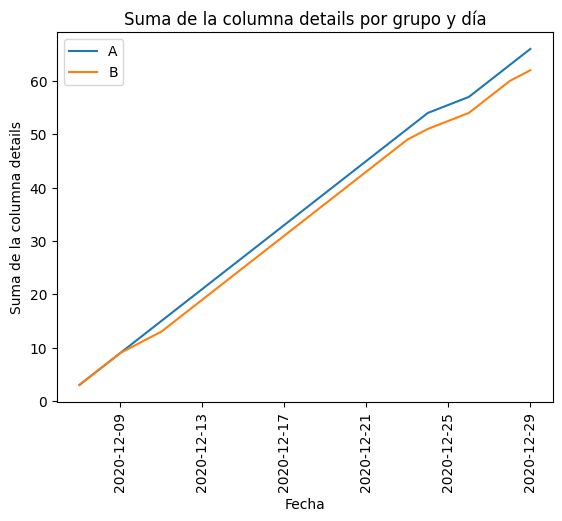

In [105]:
# Gráficamos la diferencia relativa en la compra promedio acumulada en B vs A

plt.plot(purchase_df_group_A.index, purchase_df_group_A['details'].cumsum(), label='A')
plt.plot(purchase_df_group_B.index, purchase_df_group_B['details'].cumsum(), label='B')
plt.xlabel('Fecha')
plt.ylabel('Suma de la columna details')
plt.title('Suma de la columna details por grupo y día')
plt.xticks(rotation=90)
plt.legend()


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buenas comparaciones entre los dos grupos.
</div>

In [106]:
#Elimina las anomalías y calcula la significancia estadística de la diferencia en el tamaño promedio de los pedidos. 
#Imprime el valor p para comparar los tamaños de pedido promedio de los grupos filtrados. Redondea a tres decimales.
print('{0:.3f}'.format(st.mannwhitneyu(filtered_purchase_df_A[np.logical_and(filtered_purchase_df_A['group']=='A',np.logical_not(filtered_purchase_df_A['user_id'].isin(abnormalUsers)))]['details'],filtered_purchase_df_B[np.logical_and(filtered_purchase_df_B['group']=='B',np.logical_not(filtered_purchase_df_B['user_id'].isin(abnormalUsers)))]['details'])[1]))

#Imprime la ganancia relativa del grupo B redondeada a tres decimales.
print('{0:.3f}'.format(filtered_purchase_df_B[np.logical_and(filtered_purchase_df_B['group']=='B',np.logical_not(filtered_purchase_df_B['user_id'].isin(abnormalUsers)))]['details'].mean()/filtered_purchase_df_A[np.logical_and(filtered_purchase_df_A['group']=='A',np.logical_not(filtered_purchase_df_A['user_id'].isin(abnormalUsers)))]['details'].mean() - 1))
print('Hay una diferencia estadísticamente significativa entre los tamaños de pedido promedio de los grupos. Eliminar los valores atípicos disminuyó la cantidad de ruido en los datos: la varianza disminuyó')

0.869
-0.071
Hay una diferencia estadísticamente significativa entre los tamaños de pedido promedio de los grupos. Eliminar los valores atípicos disminuyó la cantidad de ruido en los datos: la varianza disminuyó


In [107]:
# Realiza una prueba bonferroni_alpha con el número de visitantes que completaron la primera, segunda y tercera versión por día

alpha = .05

sample_A = purchase_df_group_A['details']
sample_B = purchase_df_group_B['details']

results_AB = st.ttest_ind(sample_A, sample_B)

bonferroni_alpha = alpha / 2

print('valor p para comparar los grupos A y B: ', results_AB.pvalue)

if (results_AB.pvalue < bonferroni_alpha):
    print("Hipótesis nula rechazada para los grupos А y B")
else:
    print("Hipótesis nula no rechazada para los grupos А y B")

print('Si hay una diferencia en el número de usuarios de un grupo a otro.')

valor p para comparar los grupos A y B:  0.036507493258666236
Hipótesis nula no rechazada para los grupos А y B
Si hay una diferencia en el número de usuarios de un grupo a otro.


/tmp/ipykernel_32/2285462047.py:8: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  results_AB = st.ttest_ind(sample_A, sample_B)



<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Bien hecho! Se aplicó correctamente el ajuste de Bonferroni para poder cambiar el valor de la significancia.
</div>

In [108]:
# Utiliza una prueba z para comprobar la diferencia estadística entre las proporciones.
# Probar la hipótesis de que las proporciones son iguales

# suma el total de 'users_id' en el df 'participants' que tienen valor en 'product_page' y 'product_cart' pero no en 'purchase' en la columna 'event_name'

group_A_no_purchase = participants[(participants['event_name'] != 'purchase') & (participants['group'] == 'A')]
print('Usuarios del grupo A que llegaron a la etapa de agregar productos al carrito pero no concluyeron la compra:', group_A_no_purchase['user_id'].count())

group_B_no_purchase = participants[(participants['event_name'] != 'purchase') & (participants['group'] == 'B')]
print('Usuarios del grupo B que llegaron a la etapa de agregar productos al carrito pero no concluyeron la compra:', group_B_no_purchase['user_id'].count())

# suma el total de 'users_id' en el df 'participants' que tienen valor en 'purchase' en la columna 'event_name' del 'group' == 'A'

group_A_purchase = participants[(participants['event_name'] == 'purchase') & (participants['group'] == 'A')]
print('Usuarios del grupo A que hicieron compra:', group_A_purchase['user_id'].count())

group_B_purchase = participants[(participants['event_name'] == 'purchase') & (participants['group'] == 'B')]
print('Usuarios del grupo B que hicieron compra:', group_B_purchase['user_id'].count())

print('Podemos ver que si existe una diferencia significativa entre la media de una muestra y la media de la población')

Usuarios del grupo A que llegaron a la etapa de agregar productos al carrito pero no concluyeron la compra: 16082
Usuarios del grupo B que llegaron a la etapa de agregar productos al carrito pero no concluyeron la compra: 4617
Usuarios del grupo A que hicieron compra: 2545
Usuarios del grupo B que hicieron compra: 665
Podemos ver que si existe una diferencia significativa entre la media de una muestra y la media de la población



<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Bien hecho, la prueba z se ha realizado correctamente.
</div>

In [109]:
import math as mth

alpha = .05

purchases = np.array([2545, 665])
leads = np.array([16082, 4617])

p1 = purchases[0]/leads[0]
p2 = purchases[1]/leads[1]
p_combined = (purchases[0] + purchases[1]) / (leads[0] + leads[1])
difference = p1 - p2

z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/leads[0] + 1/leads[1]))

distr = st.norm(0, 1) 

p_value = (1 - distr.cdf(abs(z_value))) * 2

print('p-value: ', p_value)

if (p_value < alpha): # escribe tu código aquí
    print("Rechazar la hipótesis nula: hay una diferencia significativa entre las proporciones")
else:
    print("No se pudo rechazar la hipótesis nula: no hay razón para pensar que las proporciones son diferentes")

p-value:  0.01864361641132617
Rechazar la hipótesis nula: hay una diferencia significativa entre las proporciones



<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Obtuviste correctamente el estadístico Z a partir de los conteos.
</div>

In [110]:
# Revisar si en cada etapa del embudo hay al menos un 10% de aumento en el group B en realición con el group A.

conversion_rate_A_product_page = purchase_df_group_A['details'].sum() / purchase_df_group_A['details'].count()
conversion_rate_B_product_page = purchase_df_group_B['details'].sum() / purchase_df_group_B['details'].count()

conversion_rate_A_product_cart = purchase_df_group_A['details'].sum() / purchase_df_group_A['details'].count()
conversion_rate_B_product_cart = purchase_df_group_B['details'].sum() / purchase_df_group_B['details'].count()

conversion_rate_A_purchase = purchase_df_group_A['details'].sum() / purchase_df_group_A['details'].count()
conversion_rate_B_purchase = purchase_df_group_B['details'].sum() / purchase_df_group_B['details'].count()

print('product_page: ', conversion_rate_B_product_page > conversion_rate_A_product_page * 1.1)
print('product_cart: ', conversion_rate_B_product_cart > conversion_rate_A_product_cart * 1.1)
print('purchase: ', conversion_rate_B_purchase > conversion_rate_A_purchase * 1.1)

product_page:  False
product_cart:  False
purchase:  False


En mi opinión, revisando la información anterior podemos decir que la introducción de un sistema de recomendaciones mejorado no generó un cambio esperado, no generó un aumento significativo en los niveles de conversión en el embudo.

Probamos através de las pruebas pasadas como el estadisitico Z que la nueva interfaz no significo un aumento de al menos el 10% que se tenía planeado. Al mismo tiempo también comprobamos mediante las pruebas y gráficos que los niveles comparados entre los dos grupos permanecieron el aumento esperado.

En mi opinión la podemos concluir la prueba con los resultados generados ya que deja claro que los resultados no mostraron una mejor conversión en vistas de la página del producto, instancias de agregar artículos al carrito de compras y compras. 


<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Las conclusiones se pueden completar más con información de los resultados de cada una de las pruebas y con alguna sugerencia o comentario final que resuma todo lo que se vió.
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buen trabajo. Gracias por atender a los comentarios. Puedo aprobar tu proyecto, éxito en los siguientes sprints.
</div>